In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [87]:
image = cv.imread('./data/1_1.jpg')
image = cv.resize(image, (745, 1024))

In [3]:
image.shape

(3501, 2550, 3)

In [6]:
cv.imshow('image', image)
cv.waitKey(500000)
cv.destroyAllWindows()

In [97]:
hsi_image = cv.cvtColor(image, cv.COLOR_BGR2HSV_FULL)
saturation_component = hsi_image[:, :, 1]
_, thresholdImage = cv.threshold(saturation_component, 30, 255, cv.THRESH_BINARY)

grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
grayImage = 255 - grayImage
_, thresholdImage = cv.threshold(grayImage, 50, 255, cv.THRESH_BINARY)

copyImage = image.copy()
numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(thresholdImage, connectivity=8)

contours, _ = cv.findContours(thresholdImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(copyImage, contours, -1, (255), thickness=cv.FILLED)



# for i in range(1, numLabels): 
#     x, y, w, h, area = stats[i]
#     if(w*h>5 and w*h<4000):
#         cv.rectangle(copyImage, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv.imshow('image', image)
cv.imshow('grayImage', grayImage)
cv.imshow('saturation_component', saturation_component)
cv.imshow('copyImage', copyImage)
cv.imshow('thresholdImage',thresholdImage)
cv.waitKey(0)
cv.destroyAllWindows()

In [102]:
for i, contour in enumerate(contours):
    # Create a mask image of zeros (black) with the same dimensions as the original image
    mask = np.zeros_like(grayImage)
    
    cv.drawContours(mask, [contour], 0, (255), -1)
    # Create a 4-channel blank image (RGBA)
    transparent_img = np.zeros((*image.shape[:2], 4), dtype=np.uint8)
    
    # Copy the original image where the mask is white
    transparent_img[:, :, :3] = image
    transparent_img[:, :, 3] = mask
    
    # cv.imshow('thresholdImage',thresholdImage)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    # Write the transparent image to a file
    cv.imwrite(f"./data/objects/wheat/contour_{i}.png", transparent_img)

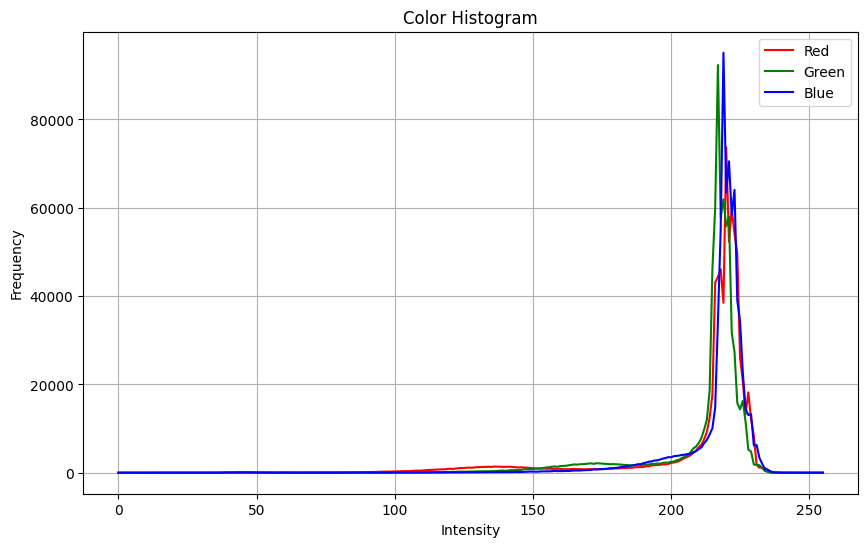

In [36]:
histogram_r = cv.calcHist([image], [0], None, [256], [0, 256])
histogram_g = cv.calcHist([image], [1], None, [256], [0, 256])
histogram_b = cv.calcHist([image], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 6))
plt.title('Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(histogram_r, color='red', label='Red')
plt.plot(histogram_g, color='green', label='Green')
plt.plot(histogram_b, color='blue', label='Blue')
plt.legend()
plt.grid()
plt.show()